### Dilution Problem in Python

A tank initially holds 100 gal of a brine solution containing 1 Ib of salt. At t = 0 another brine solution
containing 1 Ib of salt per gallon is poured into the tank at the rate of 3 gal/min, while the well-stirred
mixture leaves the tank at the same rate. Find (a) the amount of salt in the tank at any time t and (b) the
time at which the mixture in the tank contains 2 Ib of salt.

In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [118]:
V0 = 100 # initial brine solution containing 1 lb of salt in the tank
a = 1 # amount of salt that brine solution contains initially at time = 0
b = 1 # amount of salt that another brine solution contains
e = 3 # rate at which another brine solution is poured into the tank
f = 3 # rate at which well-stirred mixture leaves the tank

In [127]:
def model(y,t):
    dydt = b*e-(f*y)/(V0+e*t-f*t)
    return dydt

# integrate the equations
t = np.linspace(0,100) # times to report solution
y = odeint(model,1,t) # integrate

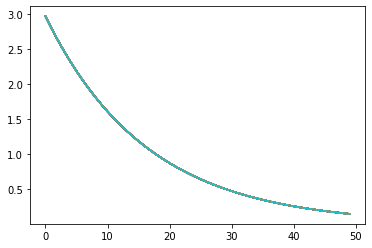

In [128]:
plt.plot(model(y,t));

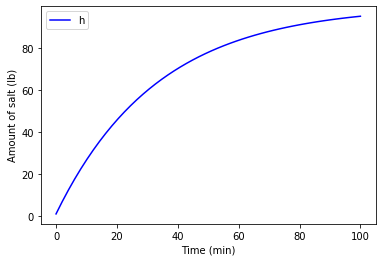

In [129]:
# plot results
plt.figure()
plt.plot(t,y,'b-')
plt.xlabel('Time (min)')
plt.ylabel('Amount of salt (lb)')
plt.legend('h1')
plt.show()

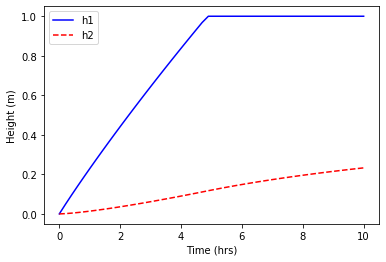

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def tank(h,t):
   # constants
   c1 = 0.13
   c2 = 0.20
   Ac = 2      # m^2
   # inflow
   qin = 0.5   # m^3/hr
   # outflow
   qout1 = c1 * h[0]**0.5
   qout2 = c2 * h[1]**0.5
   # differential equations
   dhdt1 = (qin   - qout1) / Ac
   dhdt2 = (qout1 - qout2) / Ac
   # overflow conditions
   if h[0]>=1 and dhdt1>=0:
       dhdt1 = 0
   if h[1]>=1 and dhdt2>=0:
       dhdt2 = 0
   dhdt = [dhdt1,dhdt2]
   return dhdt

# integrate the equations
t = np.linspace(0,10) # times to report solution
h0 = [0,0]            # initial conditions for height
y = odeint(tank,h0,t) # integrate

# plot results
plt.figure(1)
plt.plot(t,y[:,0],'b-')
plt.plot(t,y[:,1],'r--')
plt.xlabel('Time (hrs)')
plt.ylabel('Height (m)')
plt.legend(['h1','h2'])
plt.show()